Executing Different Data Manipulation Techniques and 

Data Cleaning and Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# For 3D pie chart and other plotting
from mpl_toolkits.mplot3d import Axes3D
#Load the dataset from CSV File
df = pd.read_csv(r"C:\Users\CAPACITI-JHB\Downloads\employee_performance 1.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1010 non-null   object 
 1   Date               1010 non-null   object 
 2   Department         1010 non-null   object 
 3   Job_Role           1010 non-null   object 
 4   Hours_Worked       1000 non-null   float64
 5   Tasks_Completed    1010 non-null   int64  
 6   Performance_Score  1010 non-null   float64
 7   Tasks_Per_Hour     1010 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 63.3+ KB
None


Handle missing values in the Hours_Worked column using an appropriate method

In [8]:

df['Hours_Worked'] = df['Hours_Worked'].fillna(df['Hours_Worked'].median())
# Print the number of missing values after filling
missing_values = df['Hours_Worked'].isnull().sum()
print("Data After Handling Missing Values:")
print(f"Remaining missing values in 'Hours_Worked': {missing_values}")


Data After Handling Missing Values:
Remaining missing values in 'Hours_Worked': 0


Remove duplicate rows if any exist.

In [11]:
#Remove duplicates
before_dedup = df.shape[0]
df.drop_duplicates(inplace=True)
after_dedup = df.shape[0]
print("After Removing Duplicates:")
print(f"Removed {before_dedup - after_dedup} duplicate rows.")

After Removing Duplicates:
Removed 10 duplicate rows.


In [13]:
#Correct data types
df['Date'] = pd.to_datetime(df['Date'])
# Convert 'Hours_Worked' column to float
df['Hours_Worked'] = df['Hours_Worked'].astype(float)

print("After Ensuring Correct Data Types:")

print(df.dtypes)

After Ensuring Correct Data Types:
Employee_ID                  object
Date                 datetime64[ns]
Department                   object
Job_Role                     object
Hours_Worked                float64
Tasks_Completed               int64
Performance_Score           float64
Tasks_Per_Hour              float64
dtype: object


In [15]:
#Identify and fla outliers in Tasks_Per_Hour
q1 = df['Tasks_Per_Hour'].quantile(0.25)
q3 = df['Tasks_Per_Hour'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['Flagged_For_Review'] = ~df['Tasks_Per_Hour'].between(lower_bound, upper_bound)
flagged_count = df['Flagged_For_Review'].sum()
print("After Flagging Outliers:")
print(f"Number of flagged Employees: {flagged_count}")
print(df[df['Flagged_For_Review']].head())
print("\n")

#save the clean dataset
cleaned_file_path = 'cleaned_employee_performance.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

After Flagging Outliers:
Number of flagged Employees: 19
    Employee_ID       Date   Department    Job_Role  Hours_Worked  \
103      E00104 2023-04-14  Engineering  Consultant           4.3   
112      E00113 2023-04-23  Engineering  Consultant           4.1   
152      E00153 2023-06-02  Engineering  Consultant           4.4   
153      E00154 2023-06-03  Engineering     Analyst           4.1   
238      E00239 2023-08-27  Engineering     Analyst           4.7   

     Tasks_Completed  Performance_Score  Tasks_Per_Hour  Flagged_For_Review  
103               19               2.41            4.42                True  
112               17               3.57            4.15                True  
152               19               1.73            4.32                True  
153               19               3.64            4.63                True  
238               20               2.35            4.26                True  


Cleaned data saved to: cleaned_employee_performance.csv


Data Transformation and Aggregation

In [18]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create new columns for 'Year' and 'Month'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display the updated DataFrame
print("\nDataset with Year and Month columns:")
print(df[['Date', 'Year', 'Month']].head())


Dataset with Year and Month columns:
        Date  Year  Month
0 2023-01-01  2023      1
1 2023-01-02  2023      1
2 2023-01-03  2023      1
3 2023-01-04  2023      1
4 2023-01-05  2023      1


In [20]:
# Calculate average performance score for each department
if 'Performance_Score' in df.columns and 'Department' in df.columns:
    avg_performance_by_dept = df.groupby('Department')['Performance_Score'].mean().reset_index()
    avg_performance_by_dept.rename(columns={'Performance_Score': 'Avg_Performance_Score'}, inplace=True)

# Display the results
print("\nAverage Performance Score by Department:")
print(avg_performance_by_dept)


Average Performance Score by Department:
    Department  Avg_Performance_Score
0  Engineering               2.947379
1      Finance               2.940204
2           HR               3.004494
3    Marketing               2.846010
4        Sales               2.932736


In [22]:
# Calculate average tasks per hour for each job role
if 'Job_Role' in df.columns and 'Tasks_Per_Hour' in df.columns:
    avg_tasks_by_role = df.groupby('Job_Role')['Tasks_Per_Hour'].mean().reset_index()
    avg_tasks_by_role.rename(columns={'Tasks_Per_Hour': 'Avg_Tasks_Per_Hour'}, inplace=True)

    # Identify the top 3 job roles
    top_3_roles = avg_tasks_by_role.nlargest(3, 'Avg_Tasks_Per_Hour')

# Display the results
print("\nTop 3 Job Roles with Highest Average Tasks Per Hour:")
print(top_3_roles)



Top 3 Job Roles with Highest Average Tasks Per Hour:
    Job_Role  Avg_Tasks_Per_Hour
0    Analyst            1.530100
2  Developer            1.447192
3    Manager            1.430457


In [24]:
# Calculate total tasks completed for each department
if 'Department' in df.columns and 'Tasks_Completed' in df.columns:
    total_tasks_by_dept = df.groupby('Department')['Tasks_Completed'].sum().reset_index()
    total_tasks_by_dept.rename(columns={'Tasks_Completed': 'Total_Tasks_Completed'}, inplace=True)

# Display the results
print("\nTotal Tasks Completed by Each Department:")
print(total_tasks_by_dept)



Total Tasks Completed by Each Department:
    Department  Total_Tasks_Completed
0  Engineering                   2337
1      Finance                   1996
2           HR                   1833
3    Marketing                   2164
4        Sales                   2177


Data Visualization

In [27]:
#Calculate the Total Tasks Completed by Employees in Each Department
# Assuming 'Tasks_Completed' is the column with task counts
total_tasks_by_dept = df.groupby('Department')['Tasks_Completed'].sum().reset_index()
print("Total Tasks Completed by Each Department:")
print(total_tasks_by_dept)

Total Tasks Completed by Each Department:
    Department  Tasks_Completed
0  Engineering             2337
1      Finance             1996
2           HR             1833
3    Marketing             2164
4        Sales             2177


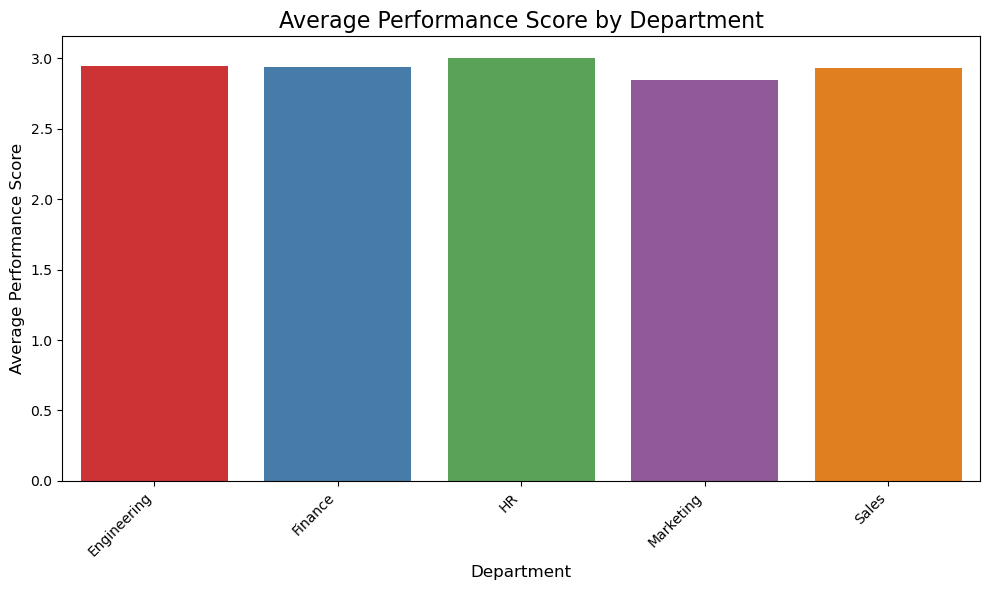

In [29]:
# Calculate the Average Performance Score for Each Department
# Assuming there's a 'Performance_Score' column
avg_performance_by_dept = df.groupby('Department')['Performance_Score'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with a hue parameter to address the deprecation warning
sns.barplot(x='Department', y='Performance_Score', data=avg_performance_by_dept, hue='Department', palette='Set1')

# Add titles and labels
plt.title('Average Performance Score by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Performance Score', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

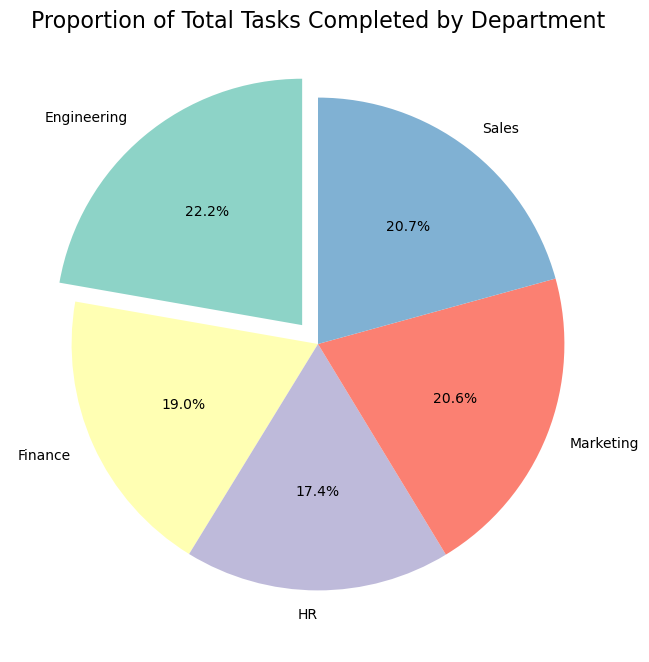

In [30]:
# Set up the pie chart
sizes = total_tasks_by_dept['Tasks_Completed']
labels = total_tasks_by_dept['Department']
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice for emphasis

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=sns.color_palette("Set3", len(sizes)))

# Title for the pie chart
plt.title('Proportion of Total Tasks Completed by Department', fontsize=16)

# Display the pie chart
plt.show()


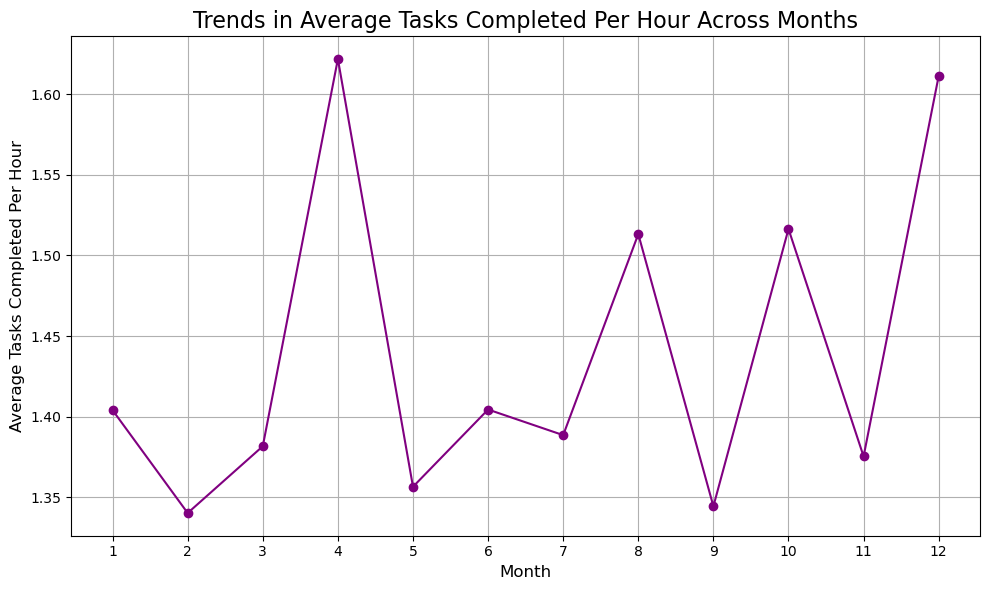

In [32]:
# Calculate average tasks completed per hour per month
df['Month'] = df['Date'].dt.month  # Ensure Month is extracted from Date
df['Tasks_Per_Hour'] = df['Tasks_Completed'] / df['Hours_Worked']  # Calculate tasks per hour

# Group by month and calculate the average tasks per hour for each month
avg_tasks_per_hour_by_month = df.groupby('Month')['Tasks_Per_Hour'].mean().reset_index()

# Set up the line plot
plt.figure(figsize=(10, 6))

# Plot the line graph in pink
plt.plot(avg_tasks_per_hour_by_month['Month'], avg_tasks_per_hour_by_month['Tasks_Per_Hour'], color='purple', marker='o')

# Add titles and labels
plt.title('Trends in Average Tasks Completed Per Hour Across Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Tasks Completed Per Hour', fontsize=12)

# Display the plot with grid
plt.grid(True)
plt.xticks(range(1, 13))  # Show months as 1 to 12
plt.tight_layout()
plt.show()

Deriving Insights and Recommendations

In [36]:
# Group by department and calculate the average performance score for each department
best_department = df.groupby("Department")["Performance_Score"].mean().reset_index()

# Sort the departments by performance score in descending order and get the top department
best_department = best_department.sort_values(by="Performance_Score", ascending=False).iloc[0]

# Print the department with the highest average performance score
print("Department with the highest average performance score:")
print(best_department)

Department with the highest average performance score:
Department                 HR
Performance_Score    3.004494
Name: 2, dtype: object


In [38]:
# Identify the lowest-performing department based on the lowest average performance score
lowest_department = df.groupby("Department")["Performance_Score"].mean().reset_index()
lowest_department = lowest_department.sort_values(by="Performance_Score").iloc[0]
# Display the lowest-performing department
print(f"Lowest Performing Department: {lowest_department['Department']} with an Average Performance Score of {lowest_department['Performance_Score']:.2f}")

Lowest Performing Department: Marketing with an Average Performance Score of 2.85
